# Digit Classifier Neural Netowrk

## Pre-Processing:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')  ## Dataset from kaggle

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
dataTest = data[0:1000].T
yTest = dataTest[0]
xTest = dataTest[1:n]

dataTrain = data[1000:m].T
yTrain = dataTrain[0]
xTrain = dataTrain[1:n]
xTrain = xTrain / 255 # dived by 255 for the softmax function

## Applied Theory:

In [2]:
def init_params(): ## randomises the weights and baises
    W1 = np.random.rand(128,784) - 0.5
    b1 = np.random.rand(128,1) - 0.5
    
    W2 = np.random.rand(64,128) - 0.5
    b2 = np.random.rand(64,1) - 0.5
    
    W3 = np.random.rand(10,64) - 0.5
    b3 = np.random.rand(10,1) - 0.5
    
    return W1, b1, W2, b2, W3, b3 
    
def ReLU(Z):
    return np.maximum(Z,0)

def softMax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))  # Numerical stability fix
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    
def forward_propagtion(X, W1, b1, W2, b2, W3, b3):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = softMax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def actual(Y):
    actual_y = np.zeros((Y.size, Y.max() + 1)) # creates the outputclasses 
    actual_y[np.arange(Y.size), Y] = 1
    actual_y = actual_y.T
    return actual_y

def dx_ReLU(Z):
    return Z>0

def back_propagation(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y):
    m = Y.size
    actual_y = actual(Y)
    
    dZ3 = A3 - actual_y    # 10x1
    dW3 = (1/m) * dZ3.dot(A2.T)   # 10
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)  
    
    dZ2 = W3.T.dot(dZ3) * dx_ReLU(Z2)
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 
    
    dZ1 = W2.T.dot(dZ2) * dx_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  
    
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [3]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def cross_entropy_loss(A3, Y):
    m = Y.size
    actual_y = actual(Y)
    loss = -np.sum(actual_y * np.log(A3)) / m  # Cross-entropy loss
    return loss

def gradient_descent(X, Y, reps, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(reps):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagtion(X, W1, b1, W2, b2, W3, b3)
        dW1, db1, dW2, db2, dW3, db3 = back_propagation(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        
        if i % 50 == 0:
            loss = cross_entropy_loss(A3, Y)
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Loss: {loss}, Accuracy: {accuracy}\n")
    return W1, b1, W2, b2, W3, b3

## Training:

In [4]:
W1, b1, W2, b2, W3, b3 = gradient_descent(xTrain, yTrain, 501, 0.1)

Iteration: 0, Loss: 14.359573443191433, Accuracy: 0.08485365853658537

Iteration: 50, Loss: 0.7660363777959581, Accuracy: 0.7671219512195122

Iteration: 100, Loss: 0.559191306756898, Accuracy: 0.8309512195121951

Iteration: 150, Loss: 0.46679794780314815, Accuracy: 0.8600487804878049

Iteration: 200, Loss: 0.4113699328539762, Accuracy: 0.8763170731707317

Iteration: 250, Loss: 0.3729221929116287, Accuracy: 0.8877804878048781

Iteration: 300, Loss: 0.3439501229877275, Accuracy: 0.8962439024390244

Iteration: 350, Loss: 0.32097233101695755, Accuracy: 0.9033170731707317

Iteration: 400, Loss: 0.3021710639429569, Accuracy: 0.9087804878048781

Iteration: 450, Loss: 0.2862677668895052, Accuracy: 0.9134390243902439

Iteration: 500, Loss: 0.2726369139076979, Accuracy: 0.9177560975609756



In [5]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_propagtion(X, W1, b1, W2, b2, W3, b3)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = xTrain[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = yTrain[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


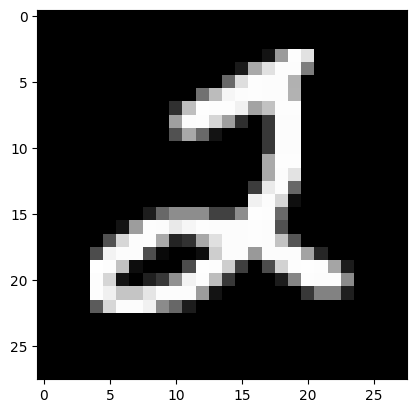

Prediction:  [8]
Label:  6


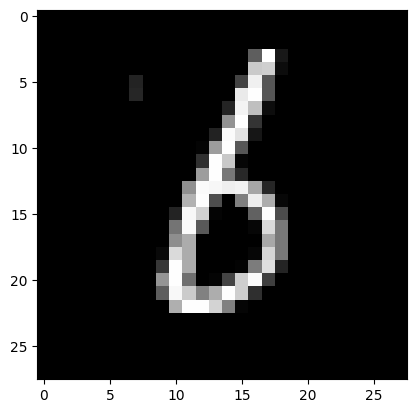

Prediction:  [4]
Label:  4


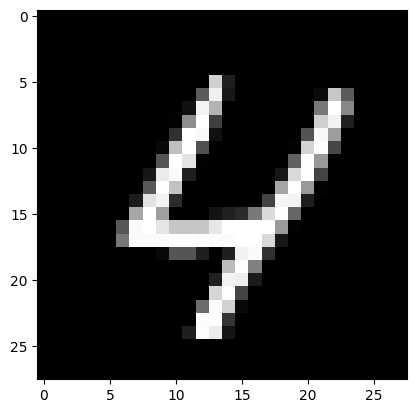

Prediction:  [1]
Label:  1


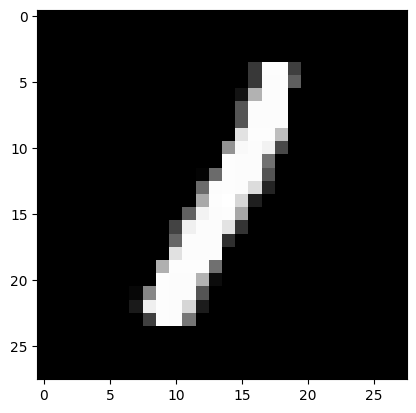

Prediction:  [2]
Label:  2


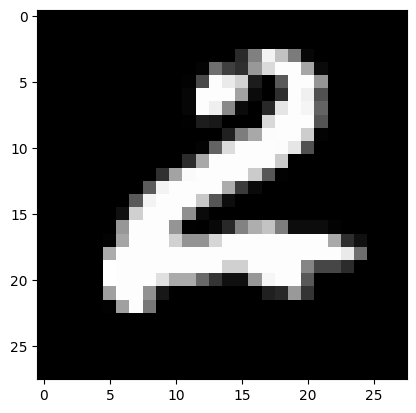

Prediction:  [7]
Label:  7


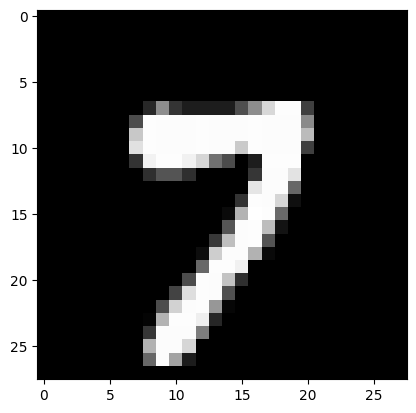

Prediction:  [6]
Label:  6


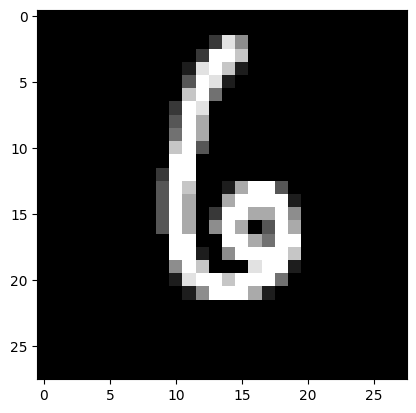

Prediction:  [7]
Label:  7


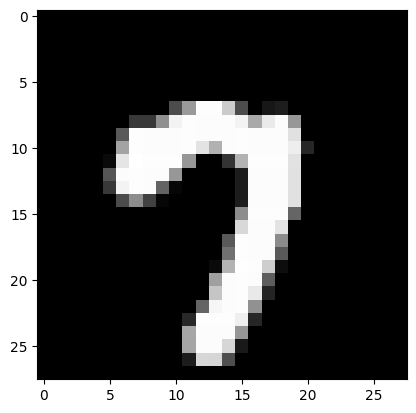

Prediction:  [0]
Label:  0


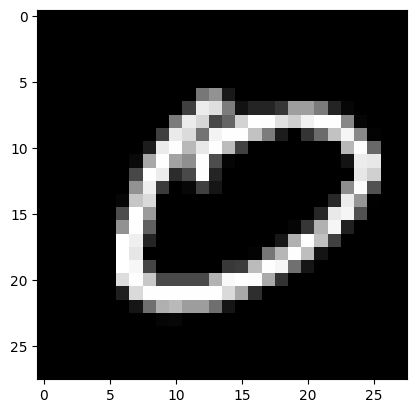

Prediction:  [6]
Label:  6


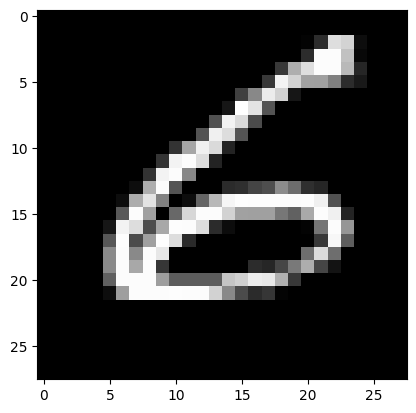

In [6]:
for i in range(10):
    test_prediction(i,W1,b1,W2,b2,W3,b3)